In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, x):
    plt.figure(figsize=(x,x))
    plt.imshow(img, cmap='gray')

In [48]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1,28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

/home/roy/.conda/envs/opencv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


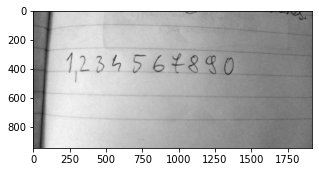

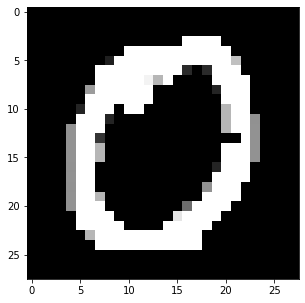

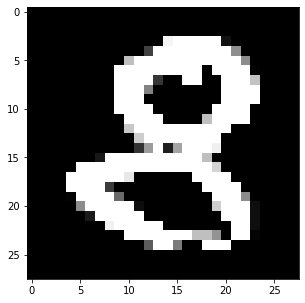

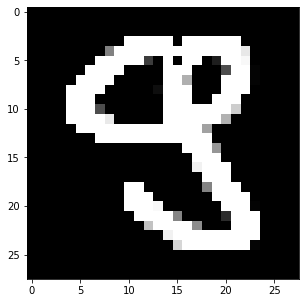

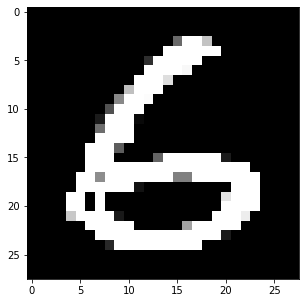

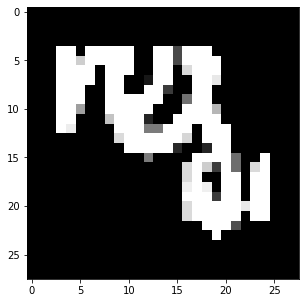

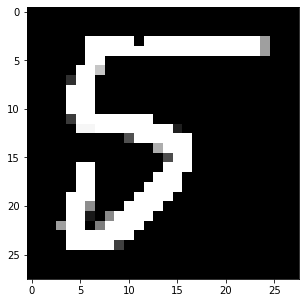

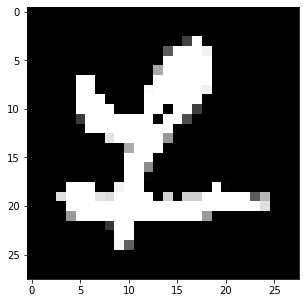

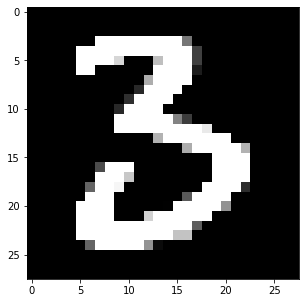

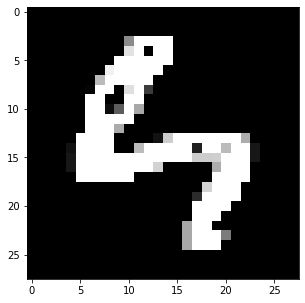

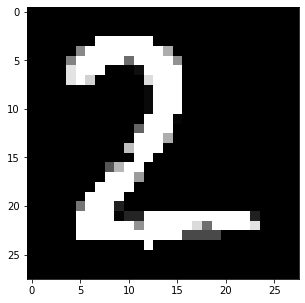

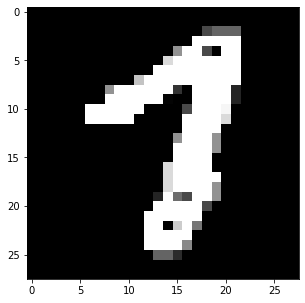

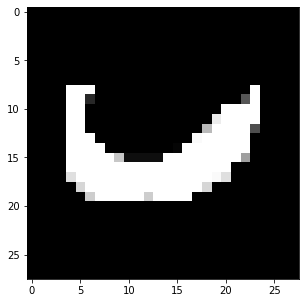

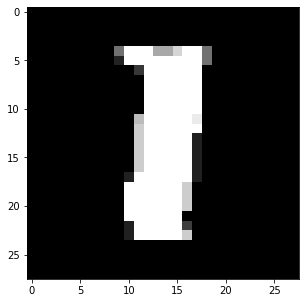

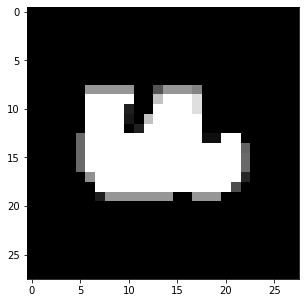

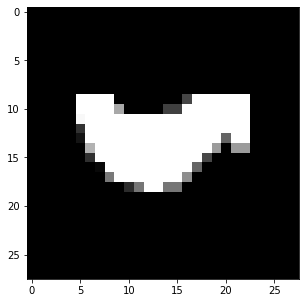

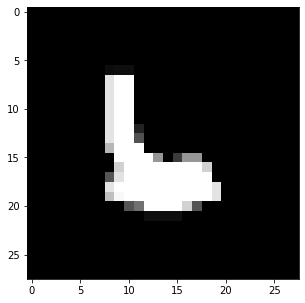

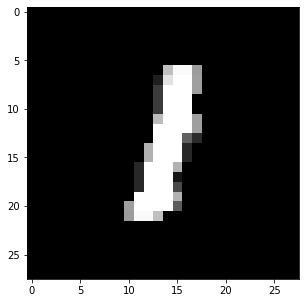

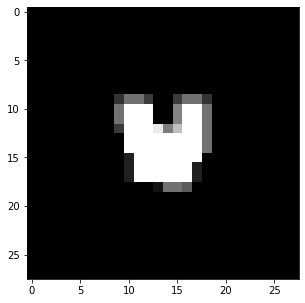

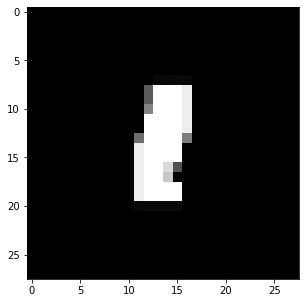

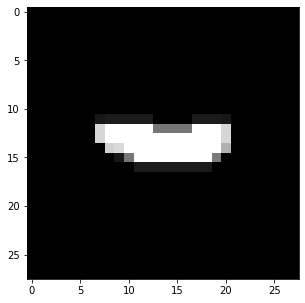

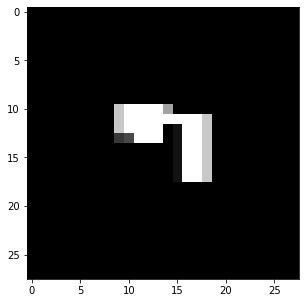

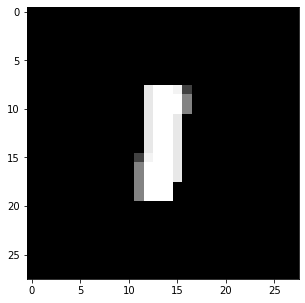

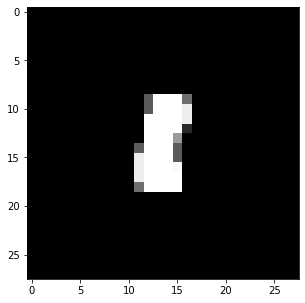

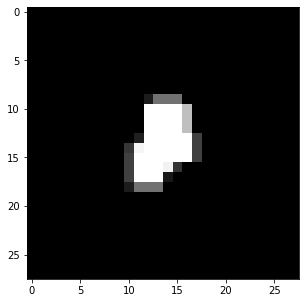

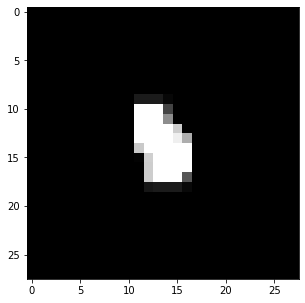

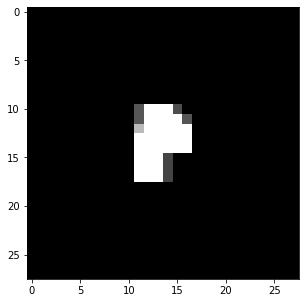

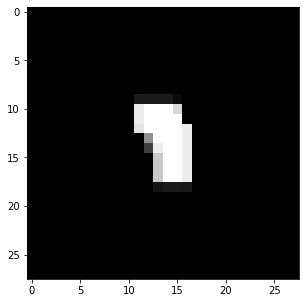

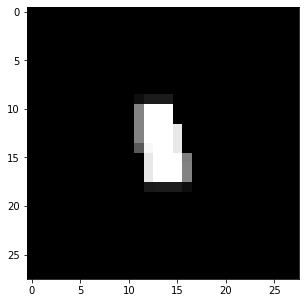

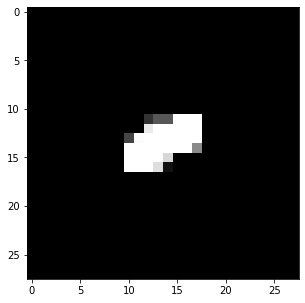

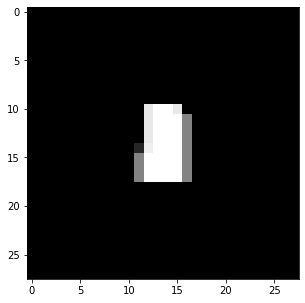

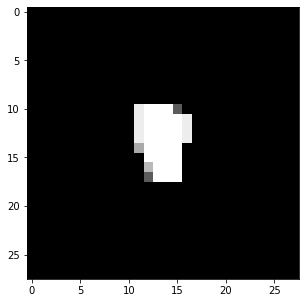

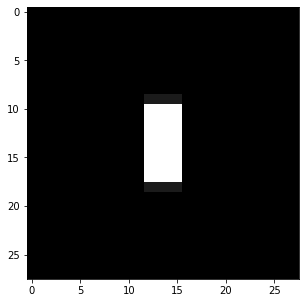

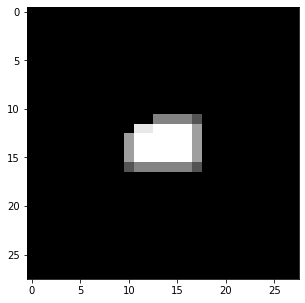

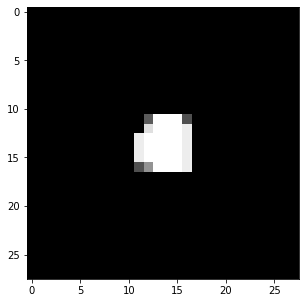

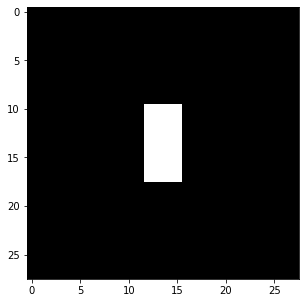

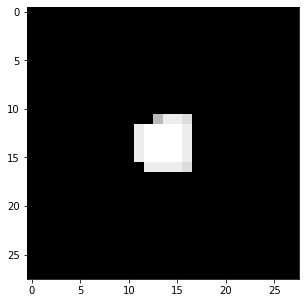

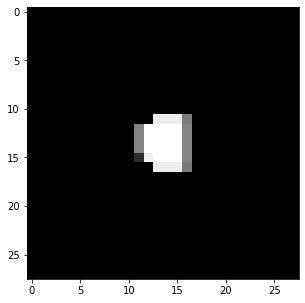

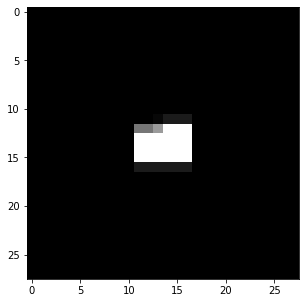

In [106]:
nums = cv2.imread('img/allnums.jpg', cv2.IMREAD_GRAYSCALE)
imshow(nums, 5)
nums_c = cv2.Canny(nums, 50 , 80)
kern_d = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
nums_d = cv2.dilate(nums_c, kern_d)

contours, hierarchy = cv2.findContours(nums_d, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_slices = [None]*len(contours)
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
kern_c = cv2.getStructuringElement(cv2.MORPH_ERODE,(3,3))
for i, c in enumerate(sorted_contours):        
    poly = cv2.approxPolyDP(c, 3, True)
    x, y, w, h = cv2.boundingRect(poly)
    sliced = nums_d[y:y+h, x:x+w]
    padded = np.pad(sliced, 15)
    eroded = cv2.erode(padded, kern_c)
    num_slices[i] = cv2.resize(eroded, (28,28), cv2.INTER_AREA)
    num_slices[i] = num_slices[i].reshape(28, 28, 1)
 
#imshow(nums_d, 10)

for sl in num_slices:
    imshow(sl, 5)

In [3]:
from tensorflow import keras

In [31]:
model = keras.models.load_model("mnist_model")

In [116]:
model.predict_classes(num_slices[10].reshape(1,28,28,1))

array([7])